In [118]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
import torchvision.transforms as transforms

In [119]:
import numpy as np

In [120]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: .\cifar10.tgz


In [121]:
with tarfile.open('./cifar10.tgz','r:gz') as tar:
    tar.extractall(path='./data')

In [122]:
data_dir='./data/cifar10'

print(os.listdir(data_dir))
classes=os.listdir(data_dir+'/train')
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [123]:
airplane_files=os.listdir(data_dir+'/train/airplane')
print('No. of training examples of airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples of airplanes: 5000
['0001.png', '0002.png', '0003.png', '0004.png', '0005.png']


In [124]:
test_dir=os.listdir(data_dir +'/test')
automobiles_files=os.listdir(data_dir +'/test' + '/automobile')
print(automobiles_files[:7])

['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png']


In [125]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [126]:
dataset=ImageFolder(data_dir+'/train',transform=ToTensor())

In [127]:
dataset.targets[49990:]

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [128]:
len(dataset)

50000

In [129]:
img,label=dataset[1]
print('label: ',dataset.classes[label],"("+str(label)+")")

label:  airplane (0)


In [130]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [131]:
#to view images the size need to be converted to (32,32,3), use img.permute
import matplotlib.pyplot as plt
def show_example(img,label):
    img=img.permute(1,2,0)
    print('label: ',dataset.classes[label],"("+str(label)+")")
    plt.imshow(img)

label:  airplane (0)


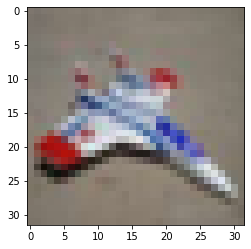

In [132]:
#* spreads the tuple elements
show_example(*dataset[1])

In [16]:
dataset[1]

(tensor([[[0.4941, 0.4784, 0.4941,  ..., 0.4863, 0.4706, 0.4588],
          [0.4784, 0.4667, 0.4745,  ..., 0.4863, 0.4784, 0.4588],
          [0.4784, 0.4745, 0.4745,  ..., 0.4941, 0.4824, 0.4745],
          ...,
          [0.4941, 0.4941, 0.5020,  ..., 0.5216, 0.4784, 0.4471],
          [0.4902, 0.4941, 0.4980,  ..., 0.5020, 0.4745, 0.4471],
          [0.4824, 0.4824, 0.4941,  ..., 0.5020, 0.4941, 0.4745]],
 
         [[0.4627, 0.4510, 0.4667,  ..., 0.4627, 0.4471, 0.4353],
          [0.4510, 0.4392, 0.4471,  ..., 0.4627, 0.4549, 0.4353],
          [0.4510, 0.4471, 0.4471,  ..., 0.4706, 0.4588, 0.4510],
          ...,
          [0.4627, 0.4627, 0.4706,  ..., 0.4902, 0.4471, 0.4157],
          [0.4588, 0.4627, 0.4667,  ..., 0.4706, 0.4431, 0.4157],
          [0.4510, 0.4510, 0.4627,  ..., 0.4667, 0.4627, 0.4431]],
 
         [[0.4314, 0.4235, 0.4353,  ..., 0.4157, 0.4000, 0.3882],
          [0.4196, 0.4078, 0.4157,  ..., 0.4157, 0.4078, 0.3882],
          [0.4196, 0.4157, 0.4157,  ...,

label:  automobile (1)


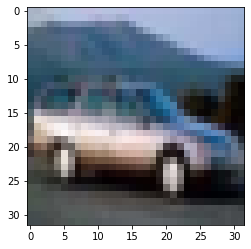

In [17]:
#* spreads the tuple elements
show_example(*dataset[5000])

In [133]:
import numpy as np
def split_indices(n,val_pct=0.1,seed=50):
    n_val=int(n*val_pct)
    indx=np.random.permutation(n)
    return indx[n_val:], indx[:n_val]


In [134]:
val_pct=0.2
rand_seed=33
train_indices, val_indices=split_indices(len(dataset),val_pct,rand_seed)

In [135]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "v-jha85/cnn-gpu-cfar10" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/v-jha85/cnn-gpu-cfar10


'https://jovian.ai/v-jha85/cnn-gpu-cfar10'

In [136]:
jovian.log_dataset({'dataset_url':'https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz',
                   'random_seed':33,
                   'val_pct':0.2})

[jovian] Dataset logged.


In [137]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [138]:
#train sampler and dataloader
batch_size=100
train_sampler=SubsetRandomSampler(train_indices)
train_dl=DataLoader(dataset,batch_size,sampler=train_sampler)

In [139]:
print(train_indices[:5])
ts=SubsetRandomSampler(train_indices[:5])
print(ts)

[31600 44481 40840 25722  5802]


In [140]:
#validation sampler and dataloader
val_sampler=SubsetRandomSampler(val_indices)
val_dl=DataLoader(dataset,batch_size,sampler=val_indices)

In [141]:
from torchvision.utils import make_grid
def show_batch(dl):
    for images,label in dl:
        fig, ax=plt.subplots(figsize=(10,10))
        #ax.set_xticks([]):ax.set_yticks([])
        ax.imshow(make_grid(images,10).permute(1,2,0))
        break    
        

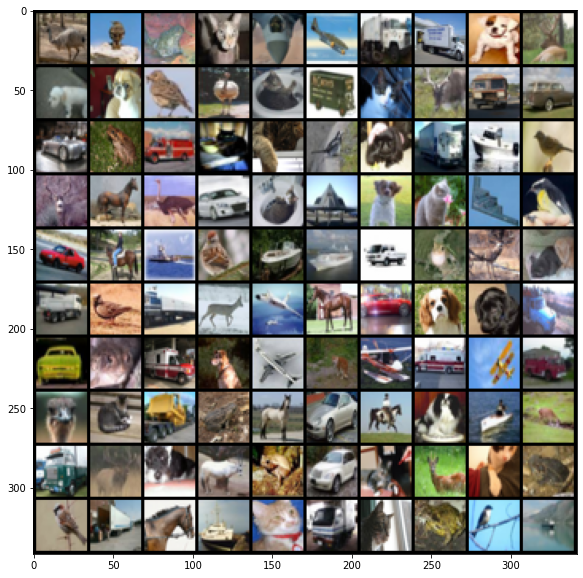

In [31]:
show_batch(train_dl)

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "v-jha85/cnn-gpu-cfar10" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/v-jha85/cnn-gpu-cfar10


'https://jovian.ai/v-jha85/cnn-gpu-cfar10'

In [142]:
import torch.nn as nn
import torch.nn.functional as F

In [34]:
simple_model=nn.Sequential(
nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
nn.MaxPool2d(2,2))

In [35]:
for images, labels in train_dl:
    out=simple_model(images)
    print('input shape',images.shape)
    print('output shape',out.shape)
    break

input shape torch.Size([100, 3, 32, 32])
output shape torch.Size([100, 8, 16, 16])


In [143]:
model=nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),#output 16*32*32
    nn.ReLU(),#output 16*32*32
    nn.MaxPool2d(2,2),#output=16*16*16

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),#output 16*16*16
    nn.ReLU(),#output 16*16*16
    nn.MaxPool2d(2,2),#output 16*8*8

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),#output 16*8*8
    nn.ReLU(),#output 16*8*8
    nn.MaxPool2d(2,2),#output 16*4*4

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),#output 16*4*4
    nn.ReLU(),#output 16*4*4
    nn.MaxPool2d(2,2),#output 16*2*2    

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),#output 16*2*2
    nn.ReLU(),#output 16*2*2
    nn.MaxPool2d(2,2),#output 16*1*1
    nn.Flatten(), #output 16, for every batch element. actual size is batch size*16
    nn.Linear(16,10))#batch size*10

In [144]:
model[3].weight.shape

torch.Size([16, 16, 3, 3])

In [145]:
model[3].weight.shape

torch.Size([16, 16, 3, 3])

In [146]:
#torch.cuda.empty_cache()
for images, labels in train_dl:
    out=model(images)
    print('input shape',images.shape)
    print('output shape',out.shape)
    print('')
    break

input shape torch.Size([100, 3, 32, 32])
output shape torch.Size([100, 10])



In [147]:
prob=F.softmax(out[0],dim=0)
prob

tensor([0.0909, 0.0956, 0.1068, 0.0912, 0.1154, 0.0932, 0.1086, 0.1306, 0.0847,
        0.0829], grad_fn=<SoftmaxBackward0>)

In [148]:
torch.sum(F.softmax(out[0],dim=0))

tensor(1., grad_fn=<SumBackward0>)

In [149]:
torch.max(prob)

tensor(0.1306, grad_fn=<MaxBackward1>)

In [150]:
dataset.classes[0]

'airplane'

In [151]:
labels[0]

tensor(5)

In [152]:
dataset.classes[labels[0]]

'dog'

##so our actual image is a ship whereas our model says it is an airplane

In [153]:
torch.cuda.is_available()

True

In [154]:
def get_default_device():
    """pick GPU if available, else pick CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data,device):
    """move data and models to device"""
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)

class DeviceDataLoader():
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
        
    def __iter__(self):
        """yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b,self.device)
            
    def __len__(self):
        """number of batches"""
        return len(self.dl)

    

In [155]:
device=get_default_device()
device

device(type='cuda')

In [156]:
torch.cuda.empty_cache()

In [157]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(val_dl,device)
to_device(model,device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=16, out_features=10, bias=True)
)

In [158]:
def loss_batch(model,loss_fn,xb,yb,opt=None, metric=None):
    #generate predictions
    preds=model(xb)
    loss=loss_fn(preds,yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result=None
    if metric is not None:
        metric_result=metric(preds,yb)
    return loss.item(),len(xb),metric_result

        

In [159]:
def evaluate(model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        results=[loss_batch(model,loss_fn, xb, yb,metric=metric) for xb,yb in valid_dl]
        losses,num,metrics=zip(*results)
        loss_avg=np.sum(np.multiply(losses,num))/np.sum(num)
    
        avg_metric=None
        if metric is not None:
            avg_metric=np.sum(np.multiply(metrics,num))/np.sum(num)
    return loss_avg, np.sum(num),avg_metric
 

In [160]:
def fit(epochs,model,loss_fn, train_dl,valid_dl,lr=None,metric=None,opt_fn=None):
    
    train_losses, val_losses, val_metrics=[], [], []
    #instantiate the optimizer
    if opt_fn is None:opt_fn=torch.optim.SGD
    opt=opt_fn(model.parameters(),lr=lr)
    
    for epoch in range(epochs):
        #training
        model.train()
        for xb,yb in train_dl:
            train_loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
            
        #Evaluation
        result=evaluate(model,loss_fn,valid_dl,metric)
        val_loss,total,val_metric=result
        
        #record the validation loss and metric
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        #print the progress
        if metric is None:
            print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}'.format(epoch+1,epochs,train_loss,val_loss)) 
        else:
            print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:4f} '.format(epoch+1,epochs,train_loss,val_loss,metric.__name__,val_metric))
    return train_losses,val_losses,val_metrics

In [161]:
def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [162]:
for xb,yb in valid_dl:
    #print(xb.shape)
    out=model(xb)
    loss=F.cross_entropy(out,yb)
    #print(loss)
    acc=accuracy(out,yb)
    print(acc)
    break

0.09


In [163]:
print(model[0].weight.shape)

torch.Size([16, 3, 3, 3])


In [164]:
val_loss,_,val_acc=evaluate(model,F.cross_entropy,valid_dl,metric=accuracy)


In [165]:
print('loss: {:.4f}, accuracy: {:.4f}'.format(val_loss,val_acc))

loss: 2.3122, accuracy: 0.1002


In [170]:
num_epochs=3
opt_fn=torch.optim.SGD
lr=0.005

In [171]:
jovian.log_hyperparams({'num_epochs':num_epochs,'opt_fn':opt_fn.__name__,
                        'batch_size':batch_size, 'learning_rate':lr})

[jovian] Hyperparams logged.


In [172]:
#training 
history=fit(num_epochs,model,F.cross_entropy,train_dl,valid_dl,lr,accuracy,opt_fn)
train_losses,val_losses,val_metrices=history


Epoch [1/3], train_loss: 1.2871, val_loss: 1.3440, val_accuracy: 0.509000 
Epoch [2/3], train_loss: 1.2668, val_loss: 1.3326, val_accuracy: 0.511800 
Epoch [3/3], train_loss: 1.2950, val_loss: 1.3286, val_accuracy: 0.510800 


In [168]:
def plot_metric(metric_values):
    plt.plot(metric_values,'-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracyvs number of epochs')


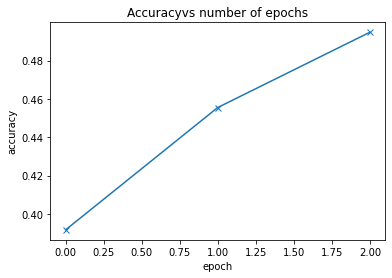

In [169]:
plot_metric(val_metrices)

In [100]:
jovian.log_metrics({'train_loss':0.9780,'val_loss':1.1247,'val_accuracy':0.5524})

[jovian] Metrics logged.


In [101]:
def plot_losses(train_loss,val_loss):
    plt.plot(train_losses,'-x')
    plt.plot(val_losses,'-o')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training','validation'])
    plt.title('loss vs number of epochs')

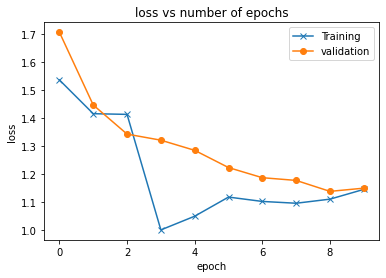

In [102]:
plot_losses(train_losses,val_losses)

In [103]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "v-jha85/cnn-gpu-cfar10" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/v-jha85/cnn-gpu-cfar10


'https://jovian.ai/v-jha85/cnn-gpu-cfar10'

In [173]:
#test on images

test_dataset=ImageFolder(data_dir+'/test',transform=ToTensor())

In [176]:
def predict_image(img,model):
    xb=img.unsqueeze(0)
    yb=model(xb.to(device))
    _,preds=torch.max(yb,dim=1)
    return dataset.classes[preds[0].item()]

Label: airplane predicted label airplane


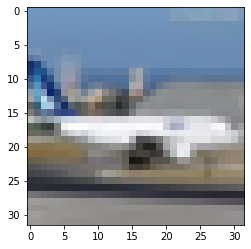

In [180]:
img,label=test_dataset[7]
plt.imshow(img.permute(1,2,0))
print('Label:',dataset.classes[label],'predicted label',predict_image(img,model))

In [181]:
test_loader=DeviceDataLoader(DataLoader(test_dataset,batch_size),device)

test_loss,_,test_accuracy=evaluate(model,F.cross_entropy,test_loader,metric=accuracy)

print('Loss: {:.4f}, Accuracy:  {:.4f}'.format(test_loss,test_accuracy))

Loss: 1.3250, Accuracy:  0.5125


In [182]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "v-jha85/cnn-gpu-cfar10" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/v-jha85/cnn-gpu-cfar10


'https://jovian.ai/v-jha85/cnn-gpu-cfar10'